## Homework 3: Imbalanced Datasets

### Instructions:
Please upload the *.ipynb* AND *.pdf* to Gradescope prior to the deadline (10/31). Submission on Courseworks/Canvas is **not** required, and won't be accepted.

Please name your soltution file in the following format - AML_HW3_Solutions_(YOUR_UNI)


### GIST:
The goal of this assignment is to build a model that can reliably predict the fraudulent transactions from a Credit Card fraud dataset. You will notice that, without much effort, you can build a model that gives you a very high ‘accuracy’ score. However, this metric is misleading since the model cannot correctly classify instances of the minority class (‘1’ in this case). This can be attributed to the  inherent imbalance present in the target column of the dataset.  

To solve this issue, you will need to employ certain ML techniques that are designed to counter class imbalance. Hence, the focus of this assignment will be towards addressing class imbalance and testing the model using different evaluation metrics other than just accuracy.

## Name:  Triyasha Ghosh Dastidar

## UNI: tg2936

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import below any other packages you need for your solution

In [2]:
#libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score, confusion_matrix, roc_curve,classification_report,ConfusionMatrixDisplay
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
# This is credit card fraud data which has class imbalance
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **1. Examining Class Imbalance.**

a. Examine the class imbalance in the target column. What is its class distribution? Show this information visually using an appropriate scale. </br>
b. What is the degree of imbalance? (Mild/Moderate/Extreme)

In [4]:
# Replace 'target_column' with the actual name of your target column
class_counts = df['Class'].value_counts()
print(f"Class Counts:\n {class_counts}")
class_distribution = class_counts / len(df)
print(f"Class Distribution:\n {class_distribution}")


Class Counts:
 Class
0    284315
1       492
Name: count, dtype: int64
Class Distribution:
 Class
0    0.998273
1    0.001727
Name: count, dtype: float64


C:\Users\h\AppData\Local\Temp\ipykernel_24956\3624564179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


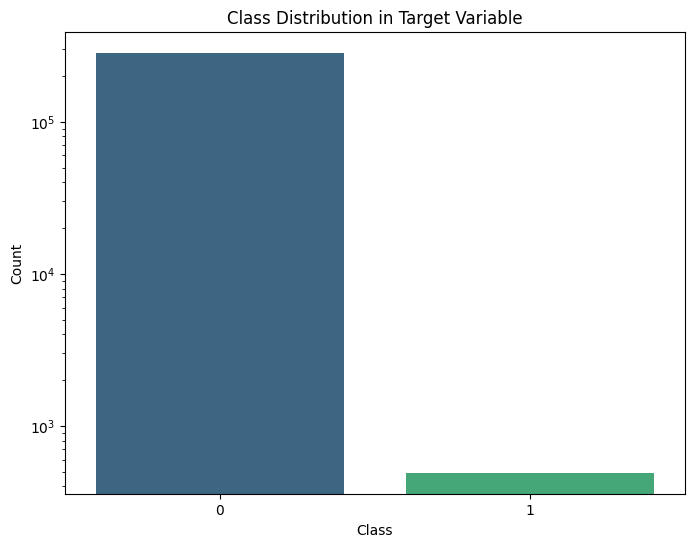

In [5]:
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.yscale('log')  # log scale since there’s high imbalance
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Target Variable')
plt.show()


**The class imbalance is extreme here since it is almost 99:1 ratio.**

### **2. Pre-processing**

The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column.
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [6]:
# You don't want the 'Time' column. Pop it off
df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
df['Log Amount'] = np.log(df.pop('Amount') + eps)

a. Split the dataset into development and test sets. What splitting methodology did you choose, and why? </br>
b. Scale numerical columns. </br>
c. Print the shape of the development and test set.

In [7]:
y = df['Class']
X = df.drop('Class', axis=1)

The splitting methodology used is 'stratify' based on y since the data is highly imbalanced. If we use random splitting, the model might be biased towards one class.

In [8]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

print(f"Shape of development set: {X_dev.shape, y_dev.shape}")
print(f"Shape of test set: {X_test.shape, y_test.shape}")

Shape of development set: ((227845, 29), (227845,))
Shape of test set: ((56962, 29), (56962,))


In [26]:
scaler = StandardScaler()

# Fit and transform the numerical columns
X_dev= scaler.fit_transform(X_dev)
X_test = scaler.transform(X_test)


In [27]:
#Verifying the data after the split is stratified.
print("Development set class distribution:\n", y_dev.value_counts(normalize=True))
print("\nTest set class distribution:\n", y_test.value_counts(normalize=True))

Development set class distribution:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Test set class distribution:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


### 3.1 Default Dataset
Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation </br>

In [28]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

decisionTreeScores = cross_validate(dt_classifier, X_dev, y_dev,
                                    cv=5, scoring=['roc_auc', 'average_precision'])

print(f"AUC: {decisionTreeScores['test_roc_auc']}")
print(f"Mean AUC: {decisionTreeScores['test_roc_auc'].mean()}")
print(f"Average Precision: {decisionTreeScores['test_average_precision'].mean()}")

dt_classifier.fit(X_dev, y_dev)

AUC: [0.88756328 0.88400873 0.81260522 0.77454358 0.82104149]
Mean AUC: 0.8359524571279693
Average Precision: 0.641744070059615


DecisionTreeClassifier(max_depth=10, random_state=42)

### 3.2 Balanced Weight

a. Here, we are going to use a 'balanced' decision tree clasifier on the same dataset. Use max_depth=10 and random_state=42, and then print the AUC and Average Precision values of 5 Fold Cross Validation.

In [29]:
balanced_dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42, class_weight='balanced')

balancedDecisionTreeScores = cross_validate(balanced_dt_classifier, X_dev, y_dev,
                                            cv=5, scoring=['roc_auc', 'average_precision'])

print(f"AUC: {balancedDecisionTreeScores['test_roc_auc']}")
print(f"Mean AUC: {balancedDecisionTreeScores['test_roc_auc'].mean()}")
print(f"Average Precision: {balancedDecisionTreeScores['test_average_precision'].mean()}")

balanced_dt_classifier.fit(X_dev, y_dev)

AUC: [0.88026358 0.95432645 0.90415573 0.91647782 0.87235086]
Mean AUC: 0.905514887383234
Average Precision: 0.5236357414975382


DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

### 3.3 Random Oversampling

a. Perform random oversampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [30]:
ros = RandomOverSampler(random_state=42)
X_dev_ros, y_dev_ros = ros.fit_resample(X_dev, y_dev)

# Examine class distribution after oversampling
class_distribution = y_dev_ros.value_counts()
print("Class distribution after random oversampling:")
print(class_distribution)

print("Shape of the development set after oversampling:", X_dev_ros.shape)

Class distribution after random oversampling:
Class
0    227451
1    227451
Name: count, dtype: int64
Shape of the development set after oversampling: (454902, 29)


In [31]:
ros_dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

oversampledDecisionTreeScores = cross_validate(ros_dt_classifier, X_dev_ros, y_dev_ros,
                                               cv=5, scoring=['roc_auc', 'average_precision'])

print(f"AUC: {oversampledDecisionTreeScores['test_roc_auc']}")
print(f"Mean AUC: {oversampledDecisionTreeScores['test_roc_auc'].mean()}")
print(f"Average Precision: {oversampledDecisionTreeScores['test_average_precision'].mean()}")

ros_dt_classifier.fit(X_dev_ros, y_dev_ros)

AUC: [0.99886808 0.99929956 0.99900977 0.99926441 0.99932258]
Mean AUC: 0.9991528810903473
Average Precision: 0.9985380738652964


DecisionTreeClassifier(max_depth=10, random_state=42)

### 3.4 Random Undersampling

a. Perform random undersampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [32]:
rus = RandomUnderSampler(random_state=42)
X_dev_rus, y_dev_rus = rus.fit_resample(X_dev, y_dev)

# Examine class distribution after undersampling
undersampled_class_distribution = y_dev_rus.value_counts()
print("Class distribution after random undersampling:")
print(undersampled_class_distribution)

print("Shape of the development set after undersampling:", X_dev_rus.shape)

Class distribution after random undersampling:
Class
0    394
1    394
Name: count, dtype: int64
Shape of the development set after undersampling: (788, 29)


In [33]:
rus_dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

undersampledDecisionTreeScores = cross_validate(rus_dt_classifier, X_dev_rus, y_dev_rus,
                                            cv=5, scoring=['roc_auc', 'average_precision'])

print(f"AUC: {undersampledDecisionTreeScores['test_roc_auc']}")
print(f"Mean AUC: {undersampledDecisionTreeScores['test_roc_auc'].mean()}")
print(f"Average Precision: {undersampledDecisionTreeScores['test_average_precision'].mean()}")

rus_dt_classifier.fit(X_dev_rus, y_dev_rus)

AUC: [0.93662875 0.94936709 0.9097901  0.92583577 0.92989289]
Mean AUC: 0.9303029182535673
Average Precision: 0.9022723811037444


DecisionTreeClassifier(max_depth=10, random_state=42)

### 3.5 SMOTE

a. Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset. (Please set random state to 42 while doing this). Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [34]:
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

# Examine class distribution after smote
smote_class_distribution = y_dev_smote.value_counts()
print("Class distribution after smote:")
print(smote_class_distribution)

print("Shape of the development set after smote:", X_dev_smote.shape)


Class distribution after smote:
Class
0    227451
1    227451
Name: count, dtype: int64
Shape of the development set after smote: (454902, 29)


In [35]:
smote_dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

smoteDecisionTreeScores = cross_validate(smote_dt_classifier, X_dev_smote, y_dev_smote,
                        cv=5, scoring=['roc_auc', 'average_precision'])

print(f"AUC: {smoteDecisionTreeScores['test_roc_auc']}")
print(f"Mean AUC: {smoteDecisionTreeScores['test_roc_auc'].mean()}")
print(f"Average Precision: {smoteDecisionTreeScores['test_average_precision'].mean()}")

smote_dt_classifier.fit(X_dev_smote, y_dev_smote)

AUC: [0.99757923 0.99738426 0.99772842 0.9972463  0.99714931]
Mean AUC: 0.9974175030591891
Average Precision: 0.9964575330041552


DecisionTreeClassifier(max_depth=10, random_state=42)

### 3.6 Visual Comparison

Prepare a plot comparing the class distribtion of the target column for each of the imbalance techiques used above. Use the default class split as well.

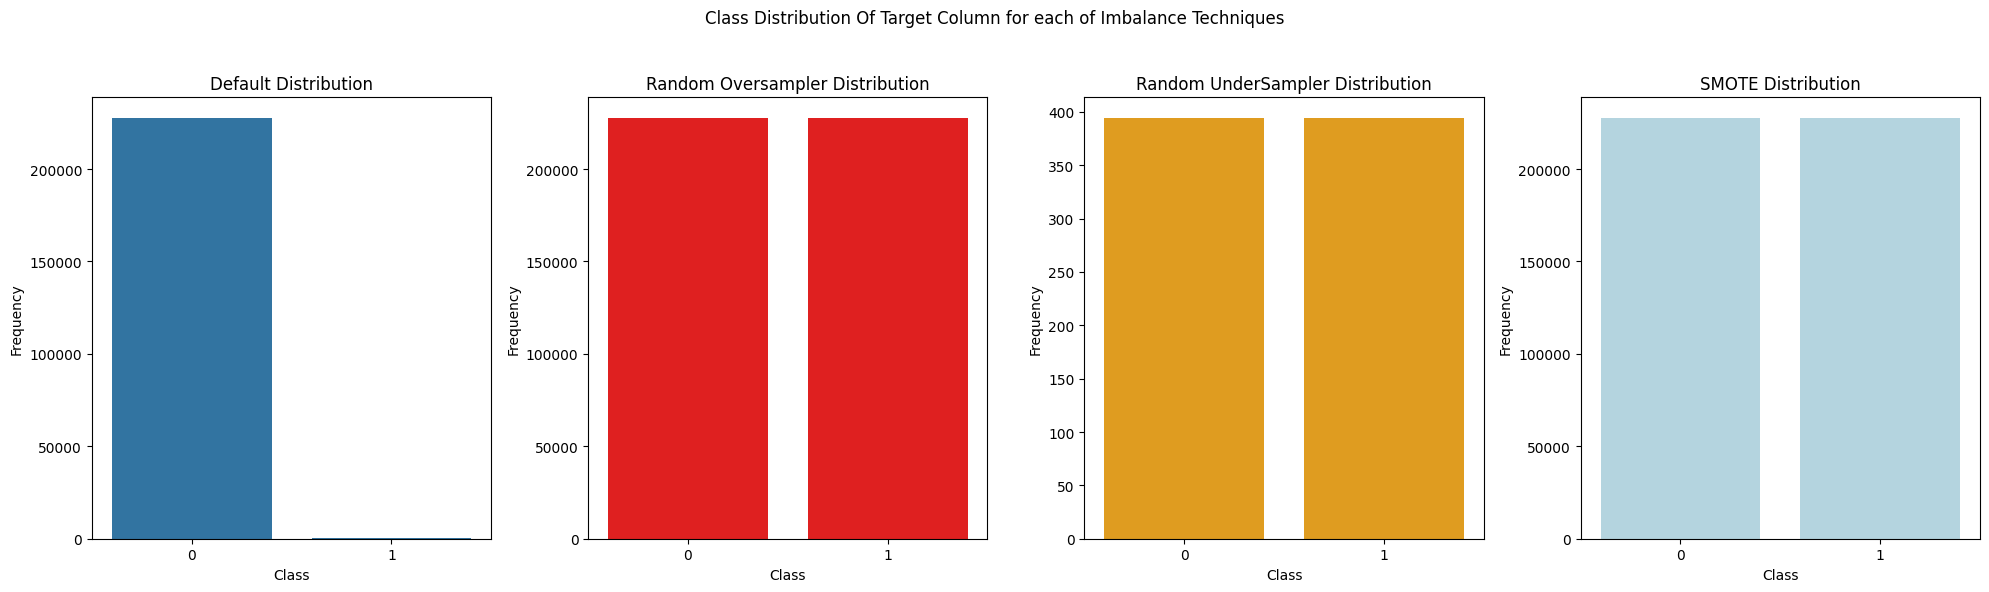

In [36]:
from collections import Counter

fig, axes = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Class Distribution Of Target Column for each of Imbalance Techniques')

# Original class distribution
sns.countplot(x=y_dev, ax=axes[0])
axes[0].set_title("Default Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Frequency")

# Oversampled distribution
sns.countplot(x=y_dev_ros, ax=axes[1], color='red')
axes[1].set_title("Random Oversampler Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Frequency")

# UnderSampled distribution
sns.countplot(x=y_dev_rus, ax=axes[2], color='orange')
axes[2].set_title("Random UnderSampler Distribution")
axes[2].set_xlabel("Class")
axes[2].set_ylabel("Frequency")

# SMOTE distribution
sns.countplot(x=y_dev_smote, ax=axes[3], color='lightblue')
axes[3].set_title("SMOTE Distribution")
axes[3].set_xlabel("Class")
axes[3].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



### **4.1: Model Prediction & Evaluation - AUC Scores**
Make predictions on the test set using the five models that you built and report their AUC values<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight). Did the models with high AUC scores on the development set exhibit similar performance on the test set? Explain.

In [37]:
models = {
    "Default Baseline": dt_classifier,
    "Balanced Weight": balanced_dt_classifier,
    "Random Oversampling": ros_dt_classifier,
    "Random Undersampling": rus_dt_classifier,
    "SMOTE": smote_dt_classifier
}

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

auc_scores = {}
predictions = {}
precision = {}
recall = {}
f1_scores = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    auc = roc_auc_score(y_test, y_pred)
    auc_scores[model_name] = auc
    f1 = f1_score(y_test, y_pred)
    f1_scores[model_name] = f1
    recall[model_name] = recall_score(y_test, y_pred)
    precision[model_name] = precision_score(y_test, y_pred)
    print(f"{model_name} AUC: {auc}")


Default Baseline AUC: 0.8774455054953889
Balanced Weight AUC: 0.8986032194250801
Random Oversampling AUC: 0.8983306392337465
Random Undersampling AUC: 0.914460782906297
SMOTE AUC: 0.9059496055034282


Values in development set:

| Technique            | Mean AUC          | Average Precision   |
|----------------------|-------------------|----------------------|
| Default Baseline     | 0.8359524571279693 | 0.641744070059615   |
| Balanced Weight      | 0.905514887383234  | 0.5236357414975382  |
| Random Oversampling  | 0.9991528810903473 | 0.9985380738652964  |
| Random Undersampling | 0.9303029182535673 | 0.9022723811037444  |
| SMOTE                | 0.9974175030591891 | 0.9964575330041552  |


The models with high AUC scores on the development set did not necessarily exhibit similar performance on the test set.

For instance, both Random Oversampling and SMOTE achieved extremely high AUC scores on the development set (around 0.999), yet their AUC scores dropped to approximately 0.898 on the test set. This may be since these techniques may have led to overfitting on the development data, which resulted in a significant performance drop on unseen test data.

On the other hand, the Random Undersampling model, which had a lower AUC score on the development set (around 0.930), maintained a relatively high performance on the test set with an AUC of 0.914. This indicates that Random Undersampling may have generalized better to new data compared to the oversampling techniques.

Therefore, Random Oversampling and SMOTE boosted AUC on the development set, they did not generalize as well to the test set, highlighting a potential issue of overfitting.

Whereas, for Balanced weight and Undersampling performed similar in both cases, showing that it generalized better.

For default decision tree classifier, the AUC actually increased.

### **4.2: Model Prediction & Evaluation - Confusion Matrix**
a. Plot Confusion Matrices for all the five models on the test set. Comment on your results and share in detail. Consider precision, recall and f1 scores. <br>
b. For the dataset at hand, which evaluation metric matters most according to you? Would it make sense to prioritise either precision/recall over the other? Justify.

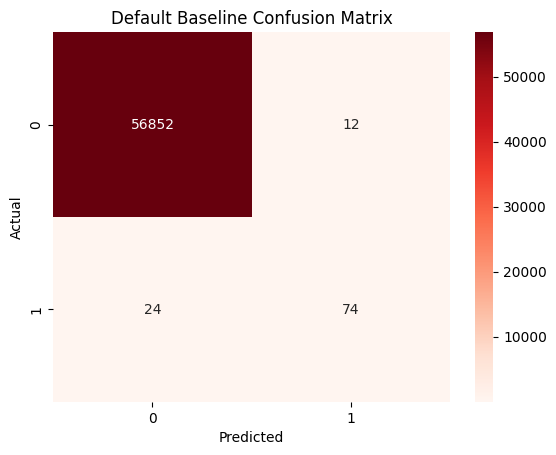

Precision of Default Baseline: 0.8604651162790697
Recall of Default Baseline: 0.7551020408163265
F1 score of Default Baseline: 0.8043478260869565


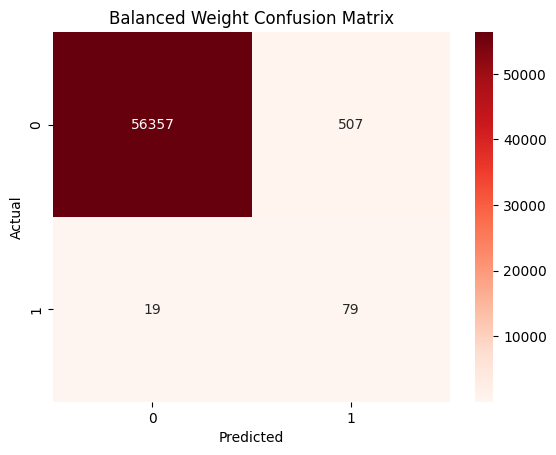

Precision of Balanced Weight: 0.1348122866894198
Recall of Balanced Weight: 0.8061224489795918
F1 score of Balanced Weight: 0.2309941520467836


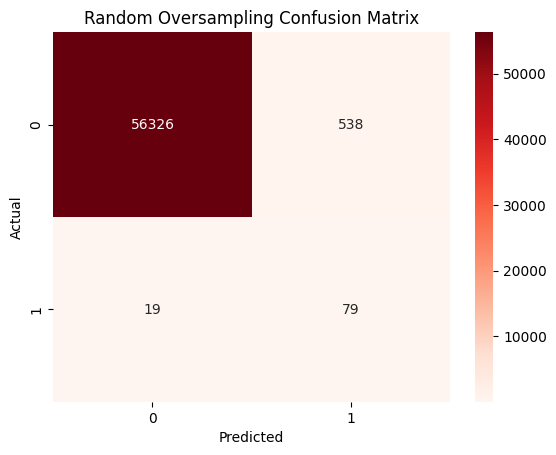

Precision of Random Oversampling: 0.1280388978930308
Recall of Random Oversampling: 0.8061224489795918
F1 score of Random Oversampling: 0.22097902097902097


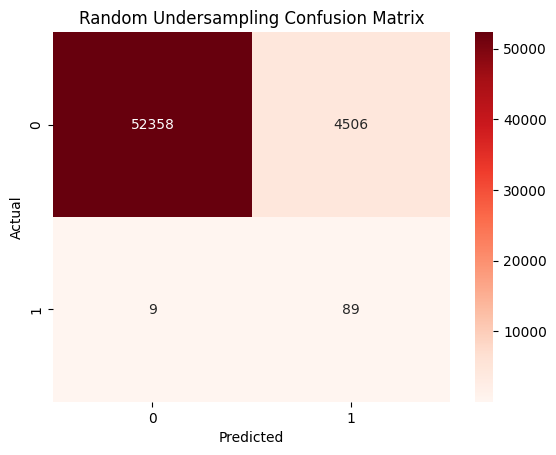

Precision of Random Undersampling: 0.01936887921653972
Recall of Random Undersampling: 0.9081632653061225
F1 score of Random Undersampling: 0.03792883017259749


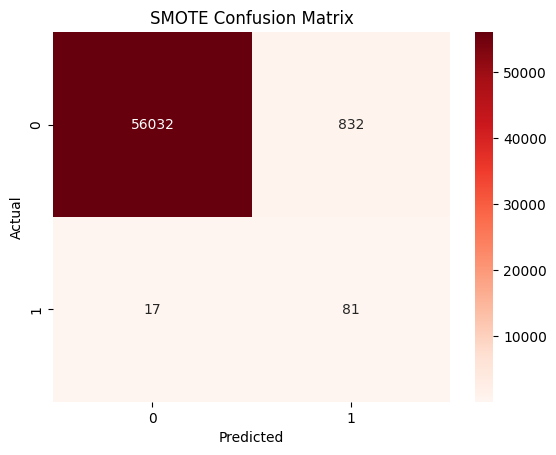

Precision of SMOTE: 0.0887185104052574
Recall of SMOTE: 0.826530612244898
F1 score of SMOTE: 0.16023738872403562


In [39]:
for model_name, model in models.items():
    cm = confusion_matrix(y_test, predictions[model_name])
    sns.heatmap(cm, annot=True, fmt='g', cmap="Reds")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    print(f"Precision of {model_name}: {precision[model_name]}")
    print(f"Recall of {model_name}: {recall[model_name]}")
    print(f"F1 score of {model_name}: {f1_scores[model_name]}")
    

In [40]:
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_scores}")

precision: {'Default Baseline': 0.8604651162790697, 'Balanced Weight': 0.1348122866894198, 'Random Oversampling': 0.1280388978930308, 'Random Undersampling': 0.01936887921653972, 'SMOTE': 0.0887185104052574}
recall: {'Default Baseline': 0.7551020408163265, 'Balanced Weight': 0.8061224489795918, 'Random Oversampling': 0.8061224489795918, 'Random Undersampling': 0.9081632653061225, 'SMOTE': 0.826530612244898}
f1_score: {'Default Baseline': 0.8043478260869565, 'Balanced Weight': 0.2309941520467836, 'Random Oversampling': 0.22097902097902097, 'Random Undersampling': 0.03792883017259749, 'SMOTE': 0.16023738872403562}


| Model               | Precision | Recall | F1 Score | Confusion Matrix Insight                                                                                   |
|---------------------|-----------|--------|----------|------------------------------------------------------------------------------------------------------------|
| **Default Baseline**       | 0.86      | 0.76   | 0.80     | Achieves a balance between precision and recall, misclassifying fewer instances compared to other techniques. |
| **Balanced Weight**        | 0.13      | 0.81   | 0.23     | Favors recall over precision, making it prone to more false positives.                                      |
| **Random Oversampling**    | 0.13      | 0.81   | 0.22     | Skewed towards recall, resulting in a higher rate of false positives.                                       |
| **Random Undersampling**   | 0.02      | 0.91   | 0.04     | Poor in precision due to heavy recall emphasis, producing excessive false positives.                        |
| **SMOTE**                  | 0.13      | 0.81   | 0.22     | Trades off precision for recall, resulting in a high rate of false positives.                               |


For this dataset, if the goal is to catch as many positive cases as possible, then recall is more important — even if it means we get some false positives along the way.

**When to prioritize recall:** If it's more important to find every potential case, even if it leads to a few extra false positives.

**When to prioritize precision:** If the system needs to be cautious with predictions (where legitimate transactions are wrongly flagged as fraudulent), then precision becomes more critical.

For our case, the choice between prioritizing recall or precision for credit card transactions depends on whether the primary goal is to catch as many fraudulent transactions as possible or to minimize disruptions for legitimate users.

Since the goal of this assignment is to build a model that can reliably predict the fraudulent transactions from a Credit Card fraud dataset, for our case it seems like recall will be more important

### **4.3: Model Prediction & Evaluation - ROC Curves**

Plot ROC for all the five models on the test set in a single plot. Recomment which technique is most appropriate and why.

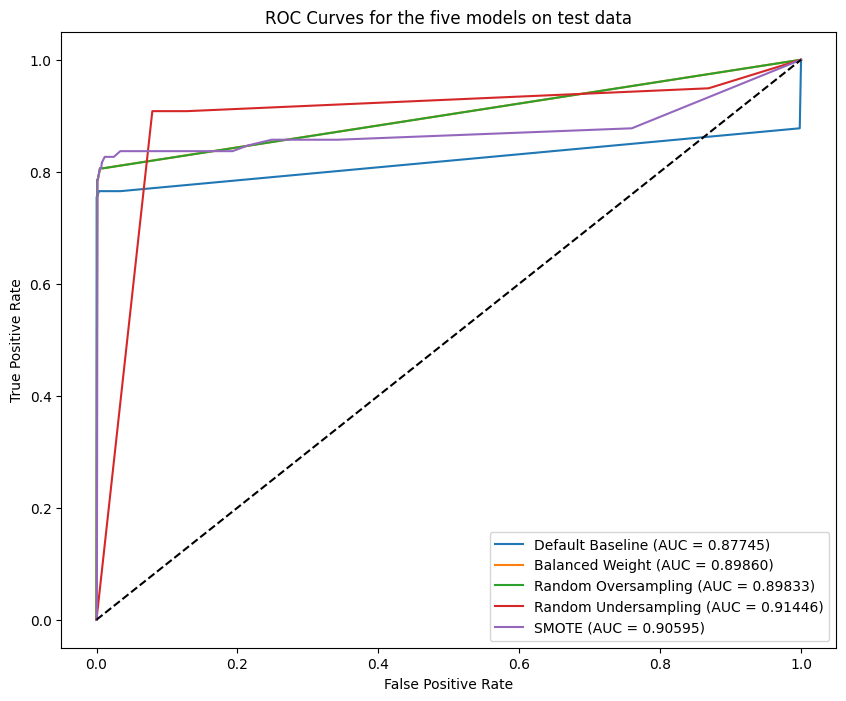

In [41]:
plt.figure(figsize=(10, 8))
plt.title('ROC Curves for the five models on test data')

for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc = auc_scores[model_name]
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In terms of AUC values, Random Undersampling performs best as seen earlier as well.

 Random Undersampling works better in this case by addressing class imbalance, enhancing the model's ability to learn from the minority class, and simplifying the dataset for more effective training. It handles overfitting better as well. But Random Undersampling can lead to reduction in context, which should be checked if it is an acceptable thing.